In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
# Step 1: Join Listings and Hosts tables
listings = pd.read_csv('/content/drive/MyDrive/Project/Host Behavior analysis (Project)/Tables/df_listing.csv')
hosts = pd.read_csv('/content/drive/MyDrive/Project/Host Behavior analysis (Project)/Tables/df_host.csv')
merged = pd.merge(listings, hosts, on='host_id')

In [ ]:
listings.shape

(19946, 22)

In [ ]:
hosts.shape

(9501, 10)

In [ ]:
# Step 2: Join Reviews table
reviews = pd.read_csv('/content/drive/MyDrive/Project/Host Behavior analysis (Project)/Tables/df_reviews.csv')
merged_reviews = pd.merge(merged, reviews, left_on='id', right_on='listing_id')

<ipython-input-5-f48ae57e0fc3>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv('/content/drive/MyDrive/Project/Host Behavior analysis (Project)/Tables/df_reviews.csv')


In [ ]:
merged_reviews.shape

(470802, 37)

In [ ]:
# Step 3: Extract text comments
comments = merged_reviews['comments']

In [ ]:
merged_reviews.tail()

,id_x,name,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,...,host_listings_count,host_has_profile_pic,host_identity_verified,host_location,id_y,listing_id,date,reviewer_id,reviewer_name,comments
470797,544471990203369728,★ Cozy on Lanark ★ Newly Built Modern 2BR 2Bath,Kensington-Cedar Cottage,49.234080,-123.075270,Entire guesthouse,Entire home/apt,4,2.0,2.0,...,0.0,True,True,Vancouver,565267266000342673,5.444720e+17,2022-02-18,269006913.0,Renee,Absolutely spotless airbnb! Perfect location f...
470798,544471990203369728,★ Cozy on Lanark ★ Newly Built Modern 2BR 2Bath,Kensington-Cedar Cottage,49.234080,-123.075270,Entire guesthouse,Entire home/apt,4,2.0,2.0,...,0.0,True,True,Vancouver,568178288809452898,5.444720e+17,2022-02-22,185010681.0,Courtney,"Our stay had everything we needed! Very clean,..."
470799,544471990203369728,★ Cozy on Lanark ★ Newly Built Modern 2BR 2Bath,Kensington-Cedar Cottage,49.234080,-123.075270,Entire guesthouse,Entire home/apt,4,2.0,2.0,...,0.0,True,True,Vancouver,568965619714272691,5.444720e+17,2022-02-23,18687606.0,Brenda,"Bright, clean, cozy but spacious laneway house..."
470800,552513157902921088,3Bed 1Bath Clean Ground Floor Quiet Free Parking,Hastings-Sunrise,49.265089,-123.040358,Entire residential home,Entire home/apt,6,3.0,3.0,...,0.0,True,True,Vancouver,568234760971032485,5.525132e+17,2022-02-22,95214377.0,Rudy,"Sheri/Alex place is at a perfect location, ver..."
470801,552513157902921088,3Bed 1Bath Clean Ground Floor Quiet Free Parking,Hastings-Sunrise,49.265089,-123.040358,Entire residential home,Entire home/apt,6,3.0,3.0,...,0.0,True,True,Vancouver,572508870411136948,5.525132e+17,2022-02-28,114570136.0,Jimmy,Loved it!


In [ ]:
# Step 4: Group reviews based on Super Host status
super_host_reviews = merged_reviews.loc[merged_reviews['host_is_superhost'] == True]
other_host_reviews = merged_reviews.loc[merged_reviews['host_is_superhost'] == False]

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Lowercase the text
super_host_comments_lower = super_host_reviews['comments'].str.lower()
other_host_comments_lower = other_host_reviews['comments'].str.lower()

# Remove punctuation and special characters
super_host_comments_no_punct = super_host_comments_lower.str.replace(r'[^\w\s]', '', regex=True)
other_host_comments_no_punct = other_host_comments_lower.str.replace(r'[^\w\s]', '', regex=True)

# Drop missing values
super_host_comments_no_punct = super_host_comments_no_punct.dropna()
other_host_comments_no_punct = other_host_comments_no_punct.dropna()

# Tokenize the text if the value is a string
super_host_comments_tokens = super_host_comments_no_punct.apply(lambda x: word_tokenize(x) if isinstance(x, str) else [])
other_host_comments_tokens = other_host_comments_no_punct.apply(lambda x: word_tokenize(x) if isinstance(x, str) else [])

# Remove stopwords
super_host_comments_clean = super_host_comments_tokens.apply(lambda words: [word for word in words if word not in stop_words])
other_host_comments_clean = other_host_comments_tokens.apply(lambda words: [word for word in words if word not in stop_words])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
super_host_comments_clean.head()

508    [great, place, two, couple, family, kids, shar...
509    [nice, apartment, like, 5star, stay, place, cl...
510    [denis, gave, us, friendly, welcome, toronto, ...
511    [apartment, located, near, intersection, two, ...
512    [apartment, clean, modern, looking, felt, like...
Name: comments, dtype: object

In [ ]:
other_host_comments_clean.tail()

470797    [absolutely, spotless, airbnb, perfect, locati...
470798    [stay, everything, needed, clean, check, easy,...
470799    [bright, clean, cozy, spacious, laneway, house...
470800    [sherialex, place, perfect, location, easy, ge...
470801                                              [loved]
Name: comments, dtype: object

In [ ]:
from collections import Counter

super_host_words = [word for comment in super_host_comments_clean for word in comment]
other_host_words = [word for comment in other_host_comments_clean for word in comment]

super_host_word_freq = Counter(super_host_words)
other_host_word_freq = Counter(other_host_words)

In [ ]:
super_host_word_freq

Counter({'great': 154973,
         'place': 150741,
         'two': 8795,
         'couple': 4993,
         'family': 10802,
         'kids': 2668,
         'share': 951,
         'excellent': 16489,
         'value': 6128,
         'location': 88425,
         'downtown': 25185,
         'spacious': 12231,
         'nice': 49079,
         'spring': 161,
         'fall': 347,
         'little': 14345,
         'stuffy': 79,
         'august': 211,
         'ac': 1191,
         'beds': 4784,
         'comfortable': 44217,
         'including': 3037,
         'fold': 53,
         'couch': 1363,
         'deck': 1020,
         'feature': 260,
         'relax': 1723,
         'evenings': 398,
         'one': 16509,
         'thing': 2915,
         'think': 2076,
         'needs': 4511,
         'improvement': 84,
         'furnishings': 478,
         'common': 663,
         'area': 18252,
         'kitchen': 14883,
         'well': 35520,
         'supplied': 569,
         'used': 2282,
   

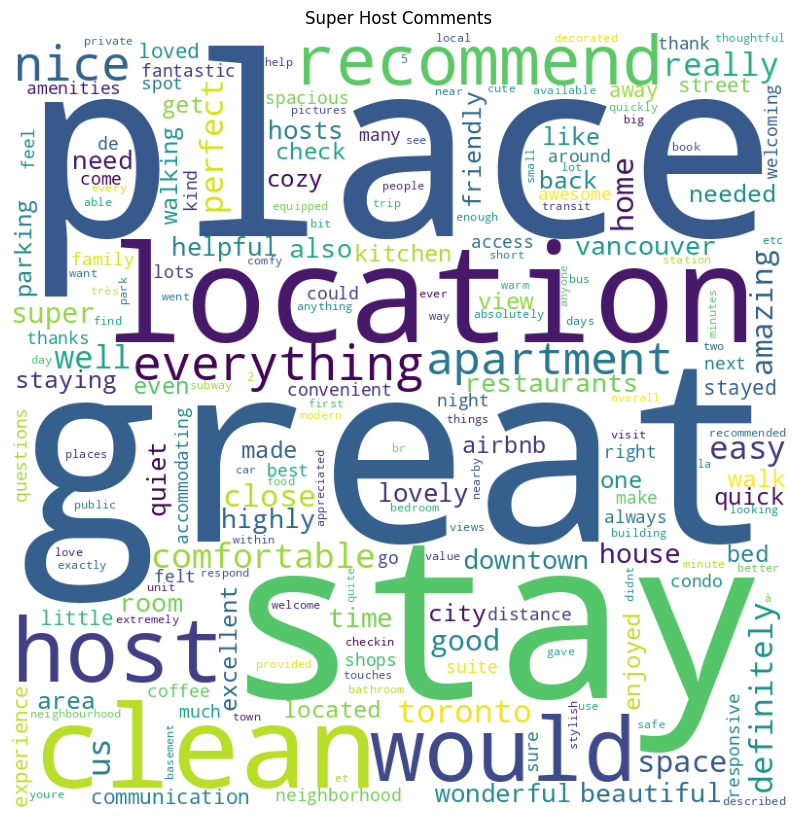

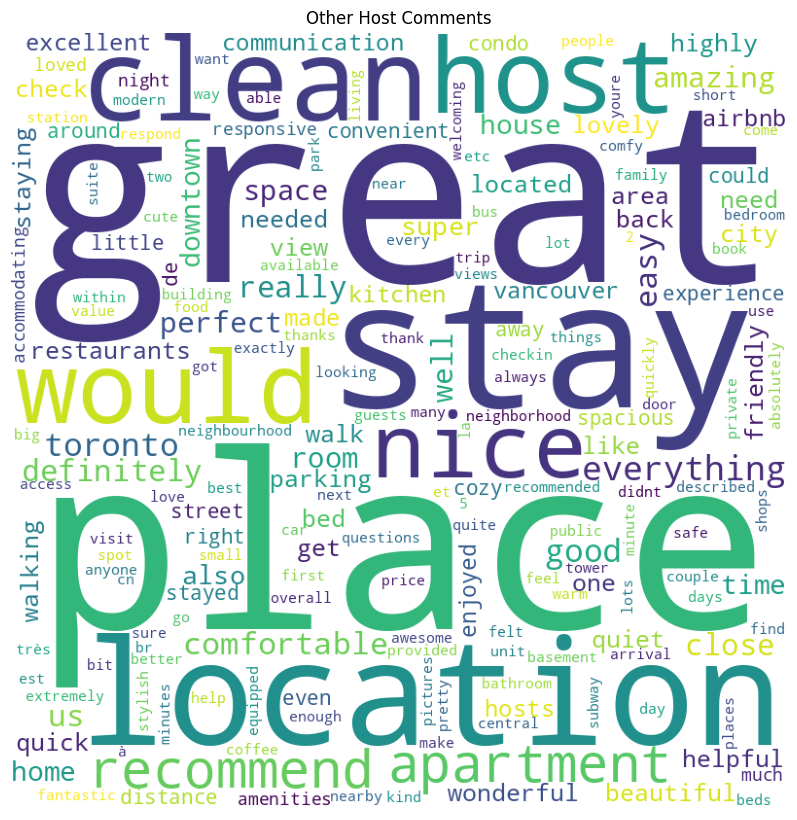

In [ ]:
# Visualize word frequencies using word clouds or bar charts
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_word_cloud(word_freq, title):
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.tight_layout(pad=0)
    plt.show()

plot_word_cloud(super_host_word_freq, 'Super Host Comments')
plot_word_cloud(other_host_word_freq, 'Other Host Comments')

In [ ]:
import pandas as pd

# Convert the Counter objects to DataFrames
super_host_word_freq_df = pd.DataFrame.from_dict(super_host_word_freq, orient='index', columns=['Frequency'])
other_host_word_freq_df = pd.DataFrame.from_dict(other_host_word_freq, orient='index', columns=['Frequency'])

# Reset the index and rename the column to 'Word'
super_host_word_freq_df = super_host_word_freq_df.reset_index().rename(columns={'index': 'Word'})
other_host_word_freq_df = other_host_word_freq_df.reset_index().rename(columns={'index': 'Word'})


In [ ]:
super_host_word_freq_df['host_is_superhost'] = True

In [ ]:
super_host_word_freq_df.head()

,Word,Frequency,host_is_superhost
0,great,154973,True
1,place,150741,True
2,two,8795,True
3,couple,4993,True
4,family,10802,True


In [ ]:
other_host_word_freq_df['host_is_superhost'] = False
other_host_word_freq_df.head()

,Word,Frequency,host_is_superhost
0,opportunity,447,False
1,arriving,491,False
2,alexandras,18,False
3,house,20159,False
4,describes,54,False


In [ ]:
comment_count = pd.concat([other_host_word_freq_df,super_host_word_freq_df],ignore_index = True)
comment_count.head()

,Word,Frequency,host_is_superhost
0,opportunity,447,False
1,arriving,491,False
2,alexandras,18,False
3,house,20159,False
4,describes,54,False


In [ ]:
comment_count.shape

(227353, 3)

In [ ]:
comment_count.to_csv('comment_freq.csv',index = False)